Habilitando acesso do Colab ao Google Drive



In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


# Bibliotecas fundamentais

In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

#Configura o pandas para não exibir resultados em notação científica
pd.options.display.float_format = '{:.2f}'.format

# Roteiro do Projeto

O livro [Mãos à Obra: Aprendizado de Máquina com Scikit-Learn, Keras & TensorFlow](https://www.oreilly.com/library/view/maos-a-obra/9788550803814/) traz uma sugestão de roteiro para orientar um projeto de aprendizado de máquina. Os passos gerais são:

1.   Abordar o problema e analisar o panorama em geral
2.   Obter os dados
3.   Explorar os dados para obter informações úteis
4.   Preparar os dados para expor melhor os padrões de dados subjacentes aos algoritmos de aprendizado de máquina.
5.   Explorar modelos diferentes e selecionar os melhores.
6.   Aperfeiçoar os modelos e os combinar em uma solução ideal.
7.   Apresentar a solução.
8.   Implementar, monitorar e fazer a manutenção de seu sistema.

# Passo 1: Abordar o problema e analisar o panorama em geral

A diversidade e amplitude de clientes que utilizam a plataforma do iFood é gigante - a cobertura do aplicativo se estende por muitas geografias no Brasil, de múltiplos gostos, regionalismos e bolsos. Alguns buscam uma experiência no momento da refeição, outros só querem receber a marmita na hora certa para não se atrasar para a primeira reunião pós-almoço.

Neste contexto, precisamos entender melhor nossos clientes! Quem é o mais fiel e quem mais compra conosco? Quem mais gosta de cupom? Quem gosta de entrega grátis? Qual o padrão de consumo? Qual o padrão de comportamento? Quanto os clientes vão gastar? Onde?

# Passo 2: Obter os dados

Dados de pedidos:

In [ ]:
pedidos = pd.read_csv('/content/drive/MyDrive/ARQUIVOS TERA/Aulas/DESAFIO IFOOD DE CLUSTERING/dados_desafio_ifood/orders.csv', sep=';', 
                      parse_dates=['confirmed_date', 'concluded_date', 'review_created_at'])

In [ ]:
pedidos.head(2)

,order_id,order_shift,order_origin,delivery_fee,scheduled,total_amount,subsidy_amount,device_platform,device_type,device_app_version,...,merchant_long,merchant_lat,has_free_delivery,confirmed_date,concluded_date,lag_last_order,account_id,review_score,nps_score,review_created_at
0,000f4c94-ec38-488b-ad98-9bf3ea19d517,weekday lunch,RESTAURANT,875.00,False,5375.00,0.00,ANDROID,MOBILE,9.39.1,...,-43.38,-22.83,False,2020-02-28 14:07:25.953000+00:00,2020-02-28 16:06:03.701000+00:00,1.00,70a2a5a3-8071-47fc-a623-e9995045314e,5.00,8,2020-02-28 19:06:31.861000+00:00
1,0018ed39-3ae0-4047-9c9e-fd9a2027e645,weekend dinner,RESTAURANT,0.00,False,2987.50,1250.00,IOS,MOBILE,9.63.0,...,-43.22,-22.93,True,2020-08-21 21:12:23.295000+00:00,2020-08-21 21:59:18.732000+00:00,1.00,407bab9f-f485-48cd-abea-66e6283058c3,5.00,8,2020-09-04 00:14:14.365000+00:00


Dados de marketing:

In [ ]:
marketing = pd.read_csv('/content/drive/MyDrive/ARQUIVOS TERA/Aulas/DESAFIO IFOOD DE CLUSTERING/dados_desafio_ifood/marketing.csv', sep=';')

In [ ]:
marketing.head(2)

,account_id,registration_date,ifood_status,ifood_status_last_month,total_order_count,first_order_date
0,7c0450e7-a806-4208-8449-e4269a27e6b5,2020-02-02,Inactive,Inactive,8,2020-02-28
1,16d0afba-00b8-427a-ba1f-2e397a9fbb54,2016-05-17,Churn,Active,457,2017-03-19


Dados de sessões:

In [ ]:
sessoes = pd.read_csv('/content/drive/MyDrive/ARQUIVOS TERA/Aulas/DESAFIO IFOOD DE CLUSTERING/dados_desafio_ifood/sessions.csv', sep=';')

In [ ]:
sessoes.head(2)

,session_id,user_account_uuid,session_started,session_ended,install_timestamp,sum_view_restaurant_screen,sum_view_dish_screen,sum_click_add_item,sum_view_checkout,sum_callback_purchase,first_order_has_voucher,media_campaign,load_time,available_restaurants,rownumber
0,0a364c77-4375-4334-8f64-a06bdd22229c,5a2fbdea-e2ee-41a5-b47c-41fbebdc78ef,2020-02-01T00:00:03.924Z,2020-02-01T00:10:51.217Z,NaN,19,5,6,6,7,False,NaN,5.00,462.00,1
1,b01811cd-ad2c-42f1-bccf-b90698ccc7a8,20cb43a7-c90d-4451-b067-e1b934746de6,2020-02-01T00:00:09.616Z,2020-02-01T00:14:22.713Z,NaN,14,1,0,0,0,NaN,NaN,5.00,128.00,2


# Passo 3: Explorar os dados para obter informações úteis

## Pedidos

In [ ]:
pedidos.describe()

,delivery_fee,total_amount,subsidy_amount,customer_long,customer_lat,merchant_zipcode,merchant_long,merchant_lat,lag_last_order,review_score,nps_score
count,226269.00,226269.00,226269.00,226269.00,226269.00,226269.00,226269.00,226269.00,226085.00,226269.00,226269.00
mean,405.42,6017.81,343.69,-45.69,-23.19,16936203.64,-45.69,-23.19,2.51,4.67,9.11
std,504.03,5180.78,677.85,2.18,2.21,20948033.42,2.19,2.21,11.99,0.93,1.90
min,-1247.50,0.00,-2.50,-67.87,-31.78,0.00,-67.84,-31.78,0.00,1.00,1.00
25%,0.00,2768.75,0.00,-46.71,-23.60,4048000.00,-46.70,-23.60,0.00,5.00,9.00
50%,0.00,4500.00,0.00,-46.62,-23.53,6473073.00,-46.62,-23.54,1.00,5.00,10.00
75%,748.75,7523.75,623.75,-43.35,-22.94,22220030.00,-43.35,-22.95,2.00,5.00,10.00
max,5000.00,174873.75,19611.25,-34.82,2.85,99070060.00,46.79,2.85,1429.00,5.00,10.00


### Tipo dos dados

In [ ]:
pedidos.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 226269 entries, 0 to 226268
Data columns (total 34 columns):
 #   Column                Non-Null Count   Dtype              
---  ------                --------------   -----              
 0   order_id              226269 non-null  object             
 1   order_shift           226269 non-null  object             
 2   order_origin          226269 non-null  object             
 3   delivery_fee          226269 non-null  float64            
 4   scheduled             226269 non-null  bool               
 5   total_amount          226269 non-null  float64            
 6   subsidy_amount        226269 non-null  float64            
 7   device_platform       226269 non-null  object             
 8   device_type           226269 non-null  object             
 9   device_app_version    221834 non-null  object             
 10  centroid_id           226269 non-null  object             
 11  state_label           226269 non-null  object       

### Dados faltantes

In [ ]:
pedidos.isnull().sum()

order_id                   0
order_shift                0
order_origin               0
delivery_fee               0
scheduled                  0
total_amount               0
subsidy_amount             0
device_platform            0
device_type                0
device_app_version      4435
centroid_id                0
state_label                0
city                       0
district                   0
customer_long              0
customer_lat               0
restaurant_id              0
dish_type                  0
group_id                   0
merchant_centroid_id       0
merchant_state             0
merchant_city              0
merchant_district          0
merchant_zipcode           0
merchant_long              0
merchant_lat               0
has_free_delivery          0
confirmed_date            14
concluded_date             4
lag_last_order           184
account_id                 0
review_score               0
nps_score                  0
review_created_at          0
dtype: int64

In [ ]:
import missingno as msno

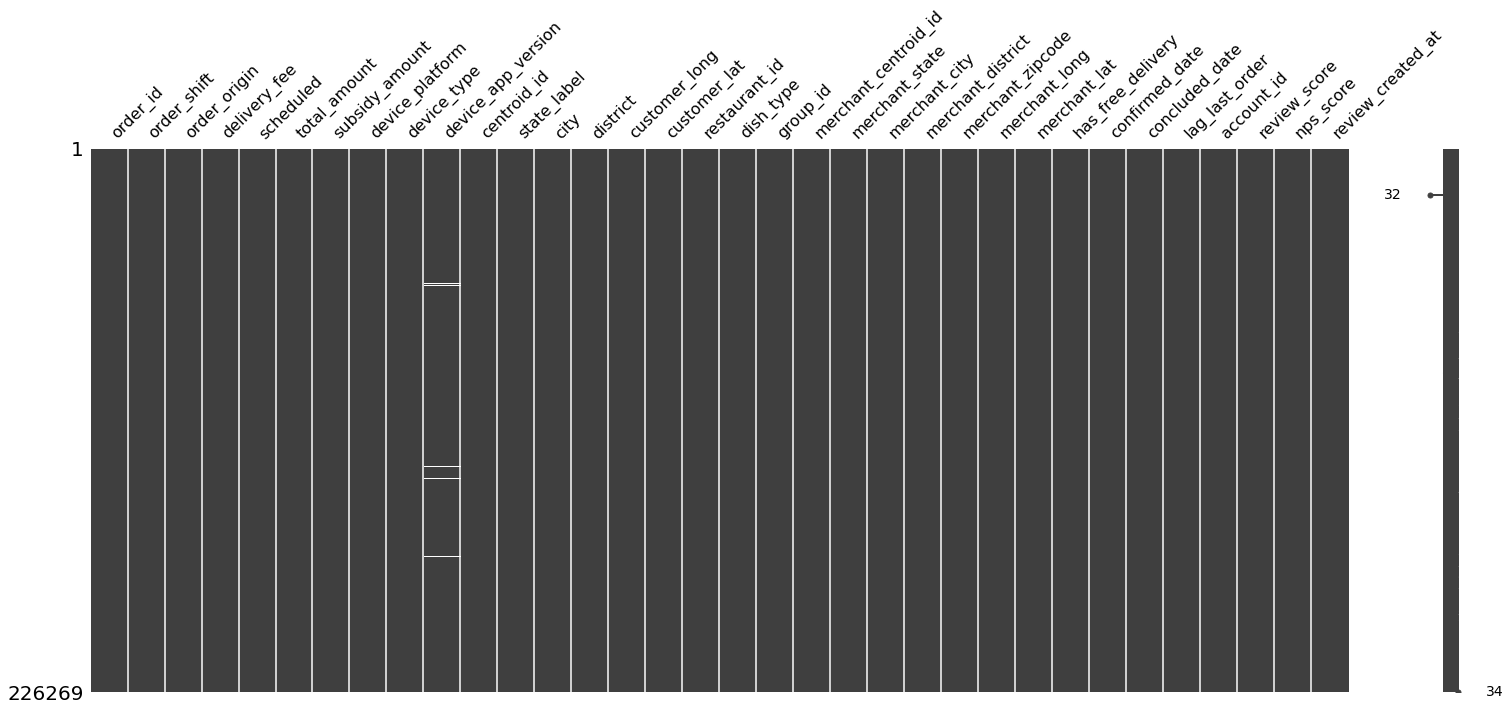

In [ ]:
msno.matrix(pedidos)

### Visualização das features

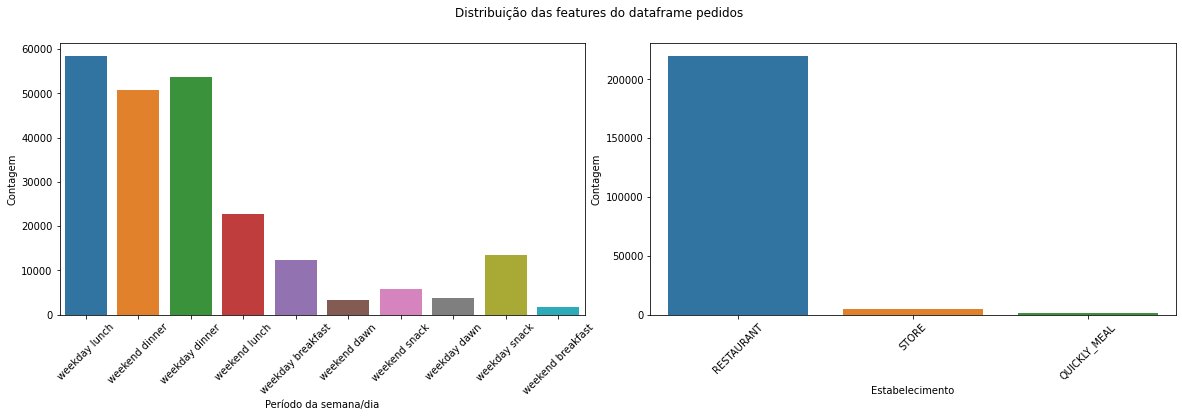

In [ ]:
fig, axes = plt.subplots(1, 2, figsize = (20,5))
fig.subplots_adjust(hspace=0.5, wspace=0.125)
fig.suptitle('Distribuição das features do dataframe pedidos')

#Order shift
sns.countplot(ax=axes[0],x=pedidos['order_shift'])
axes[0].tick_params(axis='x', rotation=45)
axes[0].set(xlabel='Período da semana/dia', ylabel='Contagem')

#Order origin
sns.countplot(ax=axes[1],x=pedidos['order_origin'])
axes[1].tick_params(axis='x', rotation=45)
axes[1].set(xlabel='Estabelecimento', ylabel='Contagem')

plt.show();

*  Há mais pedidos durante a semana no almoço. Pedidos para janta durante a semana fica em segundo lugar.
* A grande maioria dos pedidos são feitos para restaurante. Há um grande desbalanceamento na feature order_origin

> 1. Será que as pessoas tem menos tempo para fazer suas próprias refeições durante o meio da semana? Trabalho? Deslocamento?

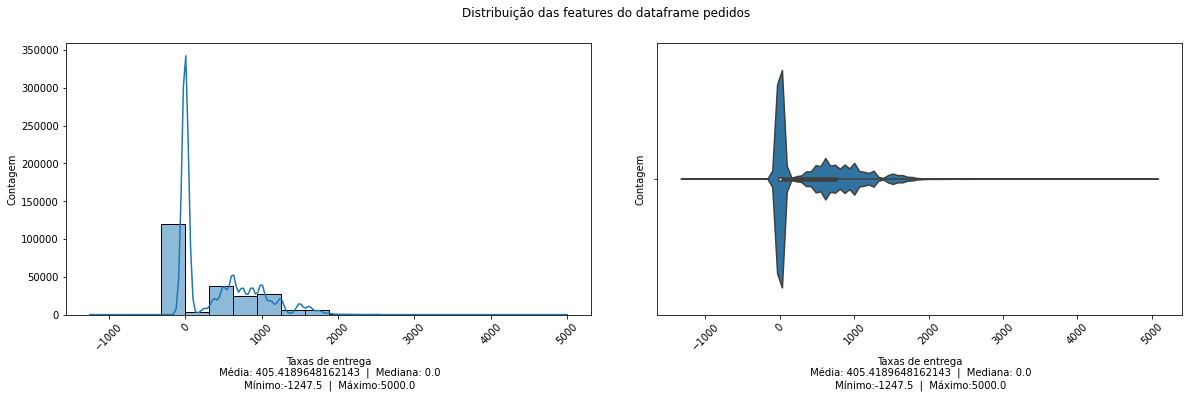

In [ ]:
fig, axes = plt.subplots(1, 2, figsize = (20,5))
fig.subplots_adjust(hspace=0.5, wspace=0.125)
fig.suptitle('Distribuição das features do dataframe pedidos')

#Taxa de entrega
sns.histplot(ax=axes[0],x=pedidos['delivery_fee'], kde=True, bins=20)
axes[0].tick_params(axis='x', rotation=45)
axes[0].set(xlabel='Taxas de entrega\n Média: ' + str(pedidos['delivery_fee'].mean()) + '  |  Mediana: ' + str(pedidos['delivery_fee'].median())
  + '\n Mínimo:' + str(pedidos['delivery_fee'].min()) + '  |  Máximo:' + str(pedidos['delivery_fee'].max()), ylabel='Contagem')

#Taxa de entrega
sns.violinplot(ax=axes[1],x=pedidos['delivery_fee'])
axes[1].tick_params(axis='x', rotation=45)
axes[1].set(xlabel='Taxas de entrega\n Média: ' + str(pedidos['delivery_fee'].mean()) + '  |  Mediana: ' + str(pedidos['delivery_fee'].median())
  + '\n Mínimo:' + str(pedidos['delivery_fee'].min()) + '  |  Máximo:' + str(pedidos['delivery_fee'].max()), ylabel='Contagem')

plt.show();

* A grande maioria das taxas de entregas fica em torno de 0 reais, porém há uns dados curiosos de taxas negativas e também taxas muito altas.
*  Entre 200 reais e 1500 reais nota-se uma densidade mais alta de valores de taxas de entregas. Entre 1500 e 2000 reais nota-se também um aumento de densidade de valores de taxas de entrega.

> 1. Qual o motivo de taxas negativas?
> 2. As taxas mais altas são outliers que podem ser descartados?



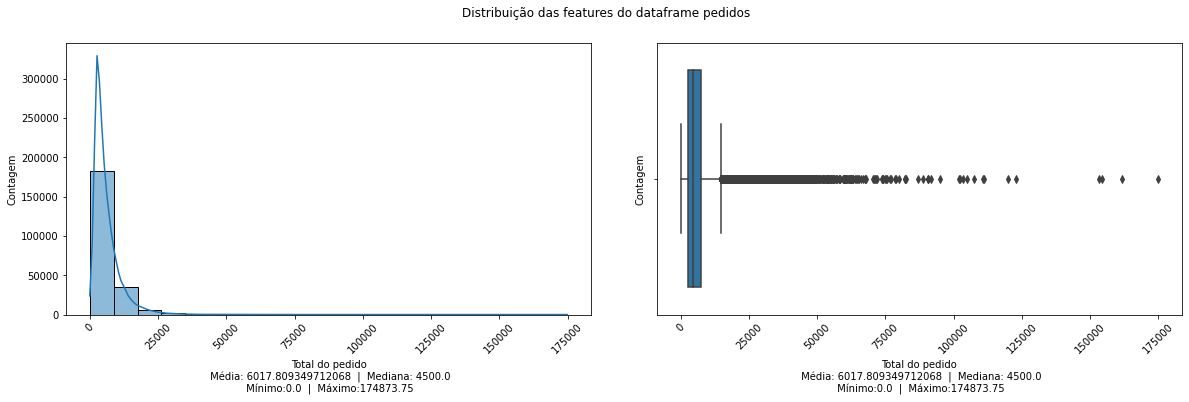

In [ ]:
fig, axes = plt.subplots(1, 2, figsize = (20, 5))
fig.subplots_adjust(hspace=0.5, wspace=0.125)
fig.suptitle('Distribuição das features do dataframe pedidos')

#Taxa do pedido
sns.histplot(ax=axes[0],x=pedidos['total_amount'], kde=True, bins=20)
axes[0].tick_params(axis='x', rotation=45)
axes[0].set(xlabel='Total do pedido\n Média: ' + str(pedidos['total_amount'].mean()) + '  |  Mediana: ' + str(pedidos['total_amount'].median())
  + '\n Mínimo:' + str(pedidos['total_amount'].min()) + '  |  Máximo:' + str(pedidos['total_amount'].max()), ylabel='Contagem')

#Taxa do pedido
sns.boxplot(ax=axes[1],x=pedidos['total_amount'])
axes[1].tick_params(axis='x', rotation=45)
axes[1].set(xlabel='Total do pedido\n Média: ' + str(pedidos['total_amount'].mean()) + '  |  Mediana: ' + str(pedidos['total_amount'].median())
  + '\n Mínimo:' + str(pedidos['total_amount'].min()) + '  |  Máximo:' + str(pedidos['total_amount'].max()), ylabel='Contagem')

plt.show();

* A grande maioria dos pedidos custam de 0 a 10 mil reais (!)
* A maior frequência de valores de pedidos fica em torno de 4500 reais (!)
* Há vários outliers de valores que vão até aprox. 175 mil reais! (!)

> * Esses valores de outliers podem ser dados verídicos, devido à quantidade deles?
> * Porque a maioria dos pedidos ficam tão caros? Se são feitos em dias comerciais, podem ser empresas que compram comida para seus funcionários através do iFood?

(!) significa 'Caraaaaaamba'